In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import math

df = pd.read_csv("fifa21_train.csv")


In [2]:
df = df.drop_duplicates(keep = False)
df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [3]:
df['bp_info'] = df.apply(lambda row: row[row['BP']], axis=1)

In [4]:
df['bp_info'] = df.apply(lambda row: row[row['BP']] if row['BP'] in row.index else None, axis=1)

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head

<bound method NDFrame.head of            id            name  age  nationality                        club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        bp   position

In [6]:
df.columns = df.columns.str.strip()
columns_needed = ['name', 'age', 'bp_info', 'wage', 'value', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'total_stats', 'base_stats', 'ir', 'ova']
df = df.loc[:, columns_needed]
df


,name,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,A. Pasche,26,63+1,€4K,€525K,258,286,346,306,290,148,48,1682,357,1 ★,64
1,Alan Carvalho,30,77+0,€23K,€8.5M,365,375,404,372,313,77,55,1961,412,2 ★,77
2,S. Giovinco,33,80+0,€49K,€9M,336,424,424,308,332,80,21,1925,404,2 ★,80
3,J. Evans,22,58+2,€4K,€275K,242,259,282,277,257,168,42,1527,329,1 ★,59
4,Y. Demoncy,23,64+2,€2K,€725K,249,280,324,280,294,185,52,1664,360,1 ★,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,63+2,€3K,€625K,224,248,333,273,266,184,61,1589,347,1 ★,65
11697,G. Gallon,27,69+2,€4K,€1.6M,84,96,237,217,101,41,347,1123,387,1 ★,70
11698,J. Flores,22,66+2,€2K,€1.1M,286,291,388,278,241,62,57,1603,337,1 ★,67
11699,Anderson Silva,26,71+0,€0,€0,254,284,198,258,241,113,81,1429,400,3 ★,68


In [7]:
pd.to_numeric(df['ir'].str.rstrip('★'), errors='coerce')
df['ir'] = pd.to_numeric(df['ir'].str.rstrip('★'), errors='coerce')

df

,name,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,A. Pasche,26,63+1,€4K,€525K,258,286,346,306,290,148,48,1682,357,1,64
1,Alan Carvalho,30,77+0,€23K,€8.5M,365,375,404,372,313,77,55,1961,412,2,77
2,S. Giovinco,33,80+0,€49K,€9M,336,424,424,308,332,80,21,1925,404,2,80
3,J. Evans,22,58+2,€4K,€275K,242,259,282,277,257,168,42,1527,329,1,59
4,Y. Demoncy,23,64+2,€2K,€725K,249,280,324,280,294,185,52,1664,360,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,63+2,€3K,€625K,224,248,333,273,266,184,61,1589,347,1,65
11697,G. Gallon,27,69+2,€4K,€1.6M,84,96,237,217,101,41,347,1123,387,1,70
11698,J. Flores,22,66+2,€2K,€1.1M,286,291,388,278,241,62,57,1603,337,1,67
11699,Anderson Silva,26,71+0,€0,€0,254,284,198,258,241,113,81,1429,400,3,68


In [8]:
df['wage'] = df['wage'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','')
df['value'] = df['value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','')
df['bp_info'] = df['bp_info'].astype(str).str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','').str.replace(r'\+\d+', '', regex=True)

df

,name,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,A. Pasche,26,63,4000,525000,258,286,346,306,290,148,48,1682,357,1,64
1,Alan Carvalho,30,77,23000,85000000,365,375,404,372,313,77,55,1961,412,2,77
2,S. Giovinco,33,80,49000,9000000,336,424,424,308,332,80,21,1925,404,2,80
3,J. Evans,22,58,4000,275000,242,259,282,277,257,168,42,1527,329,1,59
4,Y. Demoncy,23,64,2000,725000,249,280,324,280,294,185,52,1664,360,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,63,3000,625000,224,248,333,273,266,184,61,1589,347,1,65
11697,G. Gallon,27,69,4000,16000000,84,96,237,217,101,41,347,1123,387,1,70
11698,J. Flores,22,66,2000,11000000,286,291,388,278,241,62,57,1603,337,1,67
11699,Anderson Silva,26,71,0,0,254,284,198,258,241,113,81,1429,400,3,68


In [9]:
df['wage'] = pd.to_numeric(df['wage'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [10]:
df['bp_info'] = df['bp_info'].apply(lambda x : x.split('+')[0])

In [11]:
df.head(2)

,name,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,A. Pasche,26,63,4000,525000,258,286,346,306,290,148,48,1682,357,1,64
1,Alan Carvalho,30,77,23000,85000000,365,375,404,372,313,77,55,1961,412,2,77


In [12]:
df.dtypes

name           object
age             int64
bp_info        object
wage            int64
value           int64
attacking       int64
skill           int64
movement        int64
power           int64
mentality       int64
defending       int64
goalkeeping     int64
total_stats     int64
base_stats      int64
ir              int64
ova             int64
dtype: object

In [13]:
df.isnull().sum()

name           0
age            0
bp_info        0
wage           0
value          0
attacking      0
skill          0
movement       0
power          0
mentality      0
defending      0
goalkeeping    0
total_stats    0
base_stats     0
ir             0
ova            0
dtype: int64

In [14]:
df['bp_info'] = df['bp_info'].astype('int64')
df.dtypes

name           object
age             int64
bp_info         int64
wage            int64
value           int64
attacking       int64
skill           int64
movement        int64
power           int64
mentality       int64
defending       int64
goalkeeping     int64
total_stats     int64
base_stats      int64
ir              int64
ova             int64
dtype: object

In [15]:
df_num = df.select_dtypes(include = np.number)

In [16]:
df_num.head()
df_num.dtypes
df_num.columns

Index(['age', 'bp_info', 'wage', 'value', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goalkeeping', 'total_stats',
       'base_stats', 'ir', 'ova'],
      dtype='object')

C:\Users\jorda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[Text(0.5, 1.0, 'age')]

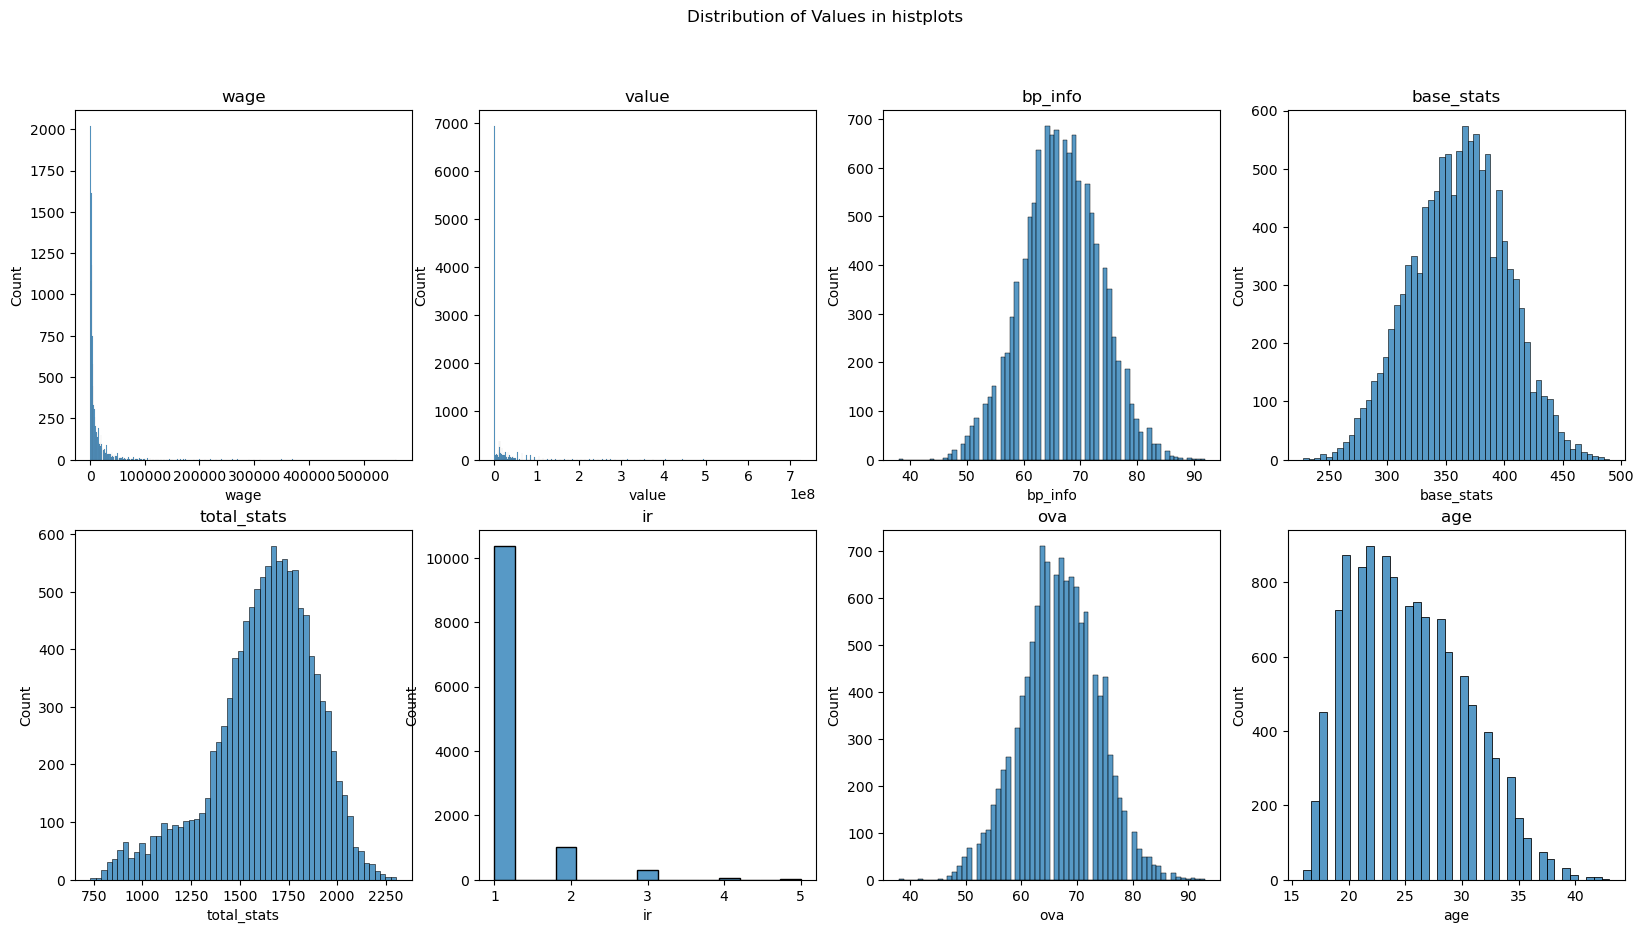

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

fig.suptitle('Distribution of Values in histplots')

sns.histplot(ax=axes[0, 0], data = df_num, x= 'wage').set(title= 'wage')
sns.histplot(ax=axes[0, 1], data = df_num, x= 'value').set(title= 'value')
sns.histplot(ax=axes[0, 2], data = df_num, x= 'bp_info').set(title= 'bp_info')
sns.histplot(ax=axes[0, 3], data = df_num, x= 'base_stats').set(title= 'base_stats')
sns.histplot(ax=axes[1, 0], data = df_num, x= 'total_stats').set(title= 'total_stats')
sns.histplot(ax=axes[1, 1], data = df_num, x= 'ir').set(title= 'ir')
sns.histplot(ax=axes[1, 2], data = df_num, x= 'ova').set(title= 'ova')
sns.histplot(ax=axes[1, 3], data = df_num, x= 'age').set(title= 'age')

[Text(0.5, 1.0, 'age')]

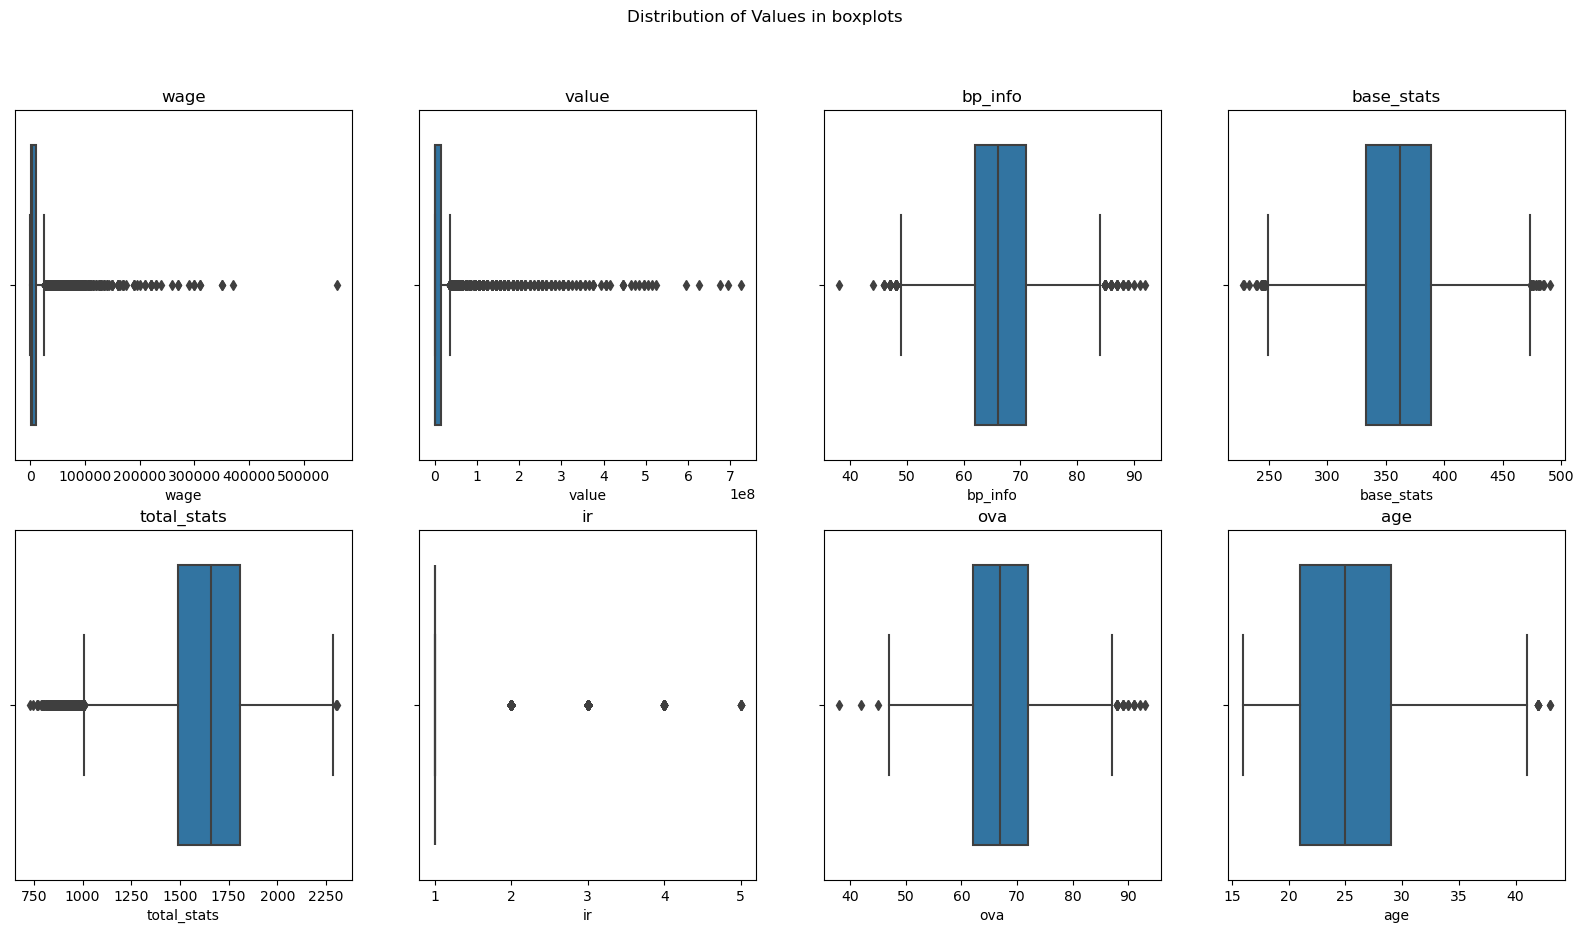

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

fig.suptitle('Distribution of Values in boxplots')

sns.boxplot(ax=axes[0, 0], data = df_num, x= 'wage').set(title= 'wage')
sns.boxplot(ax=axes[0, 1], data = df_num, x= 'value').set(title= 'value')
sns.boxplot(ax=axes[0, 2], data = df_num, x= 'bp_info').set(title= 'bp_info')
sns.boxplot(ax=axes[0, 3], data = df_num, x= 'base_stats').set(title= 'base_stats')
sns.boxplot(ax=axes[1, 0], data = df_num, x= 'total_stats').set(title= 'total_stats')
sns.boxplot(ax=axes[1, 1], data = df_num, x= 'ir').set(title= 'ir')
sns.boxplot(ax=axes[1, 2], data = df_num, x= 'ova').set(title= 'ova')
sns.boxplot(ax=axes[1, 3], data = df_num, x= 'age').set(title= 'age')

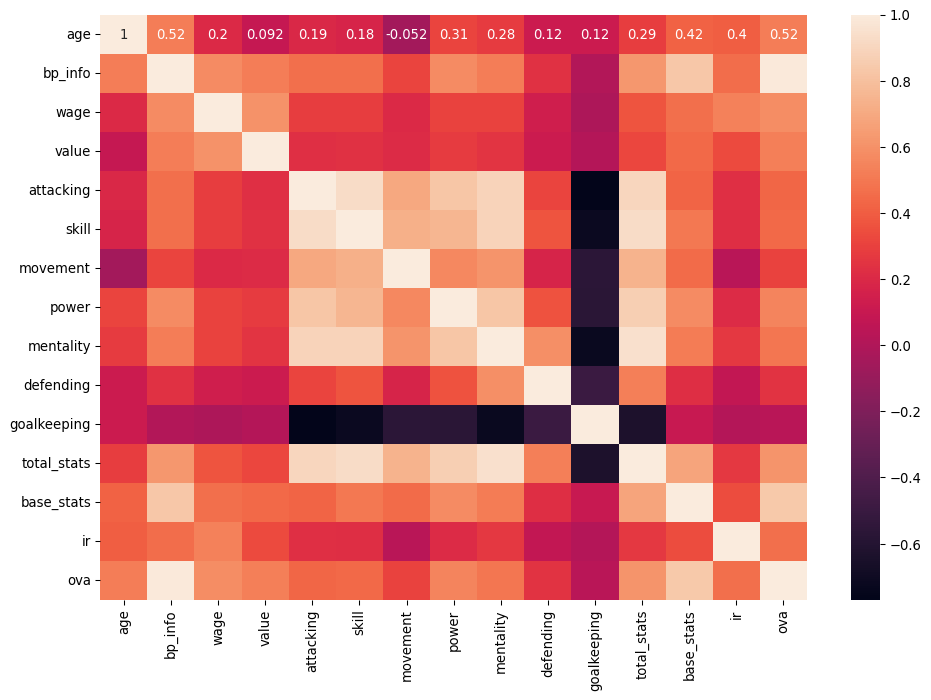

In [18]:
plt.figure(figsize = (12, 8), dpi=95)

correlation_matrix= df_num.corr()
sns.heatmap(correlation_matrix, annot=True);

In [19]:
y = df_num['ova']
x = df_num.drop(['ova'], axis=1)

In [20]:
MinMaxtransformer = MinMaxScaler().fit(df_num)
x_normalized = MinMaxtransformer.transform(df_num)
x_normalized.shape
x_normalized = pd.DataFrame(x_normalized, columns=df_num.columns)
x_normalized.head()

,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,0.370370,0.462963,0.007143,0.000724,0.556931,0.569087,0.663818,0.556270,0.654596,0.524,0.084309,0.604577,0.492366,0.00,0.472727
1,0.518519,0.722222,0.041071,0.117241,0.821782,0.777518,0.829060,0.768489,0.718663,0.240,0.100703,0.781945,0.702290,0.25,0.709091
2,0.629630,0.777778,0.087500,0.012414,0.750000,0.892272,0.886040,0.562701,0.771588,0.252,0.021077,0.759059,0.671756,0.25,0.763636
3,0.222222,0.370370,0.007143,0.000379,0.517327,0.505855,0.481481,0.463023,0.562674,0.604,0.070258,0.506039,0.385496,0.00,0.381818
4,0.259259,0.481481,0.003571,0.001000,0.534653,0.555035,0.601140,0.472669,0.665738,0.672,0.093677,0.593134,0.503817,0.00,0.490909


In [21]:
Standardtransformer = StandardScaler().fit(df_num)
x_standardized = Standardtransformer.transform(df_num)
x_standardized.shape
x_standardized = pd.DataFrame(x_standardized, columns=df_num.columns)
x_standardized.head()

,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,0.147155,-0.514583,-0.303314,-0.384571,-0.006672,0.253837,0.422621,0.078813,0.449608,0.118927,-0.366014,0.200239,-0.101852,-0.327964,-0.424966
1,0.954025,1.540062,0.592274,1.827384,1.474011,1.412208,1.470920,1.406898,0.815079,-1.033739,-0.279826,1.270208,1.262350,1.885132,1.465727
2,1.559177,1.980344,1.817816,-0.162655,1.072704,2.049963,1.832403,0.119058,1.116989,-0.985035,-0.698452,1.132147,1.063921,1.885132,1.902041
3,-0.659715,-1.248385,-0.303314,-0.391117,-0.228083,-0.097579,-0.734124,-0.504739,-0.074762,0.443621,-0.439889,-0.394188,-0.796355,-0.327964,-1.152155
4,-0.457997,-0.367823,-0.397586,-0.379334,-0.131216,0.175744,0.024990,-0.444372,0.513168,0.719611,-0.316764,0.131209,-0.027441,-0.327964,-0.279528


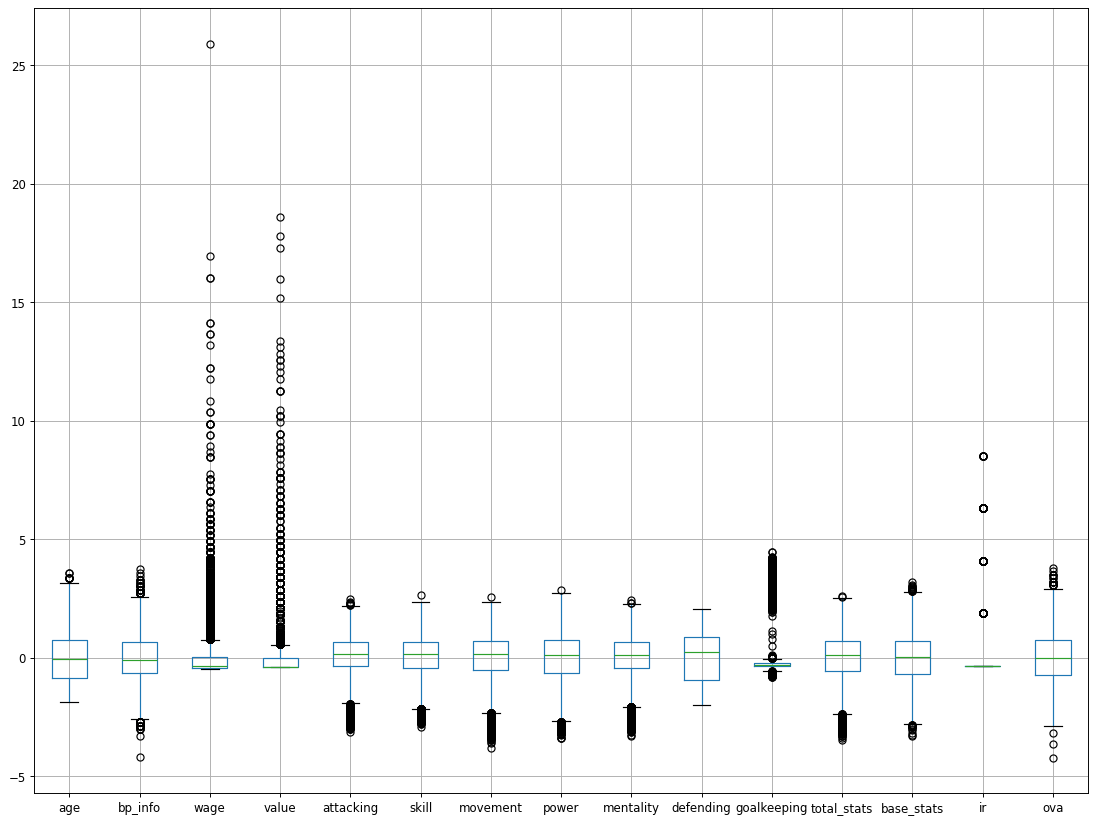

In [40]:
plt.figure(figsize = (16,12), dpi = 85)

x_standardized.boxplot(['age', 'bp_info', 'wage', 'value', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'total_stats', 'base_stats', 'ir', 'ova']);

In [23]:
x.head(2)
y.head(2)

0    64
1    77
Name: ova, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1000)

In [25]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [26]:
predictions =lm.predict(x_test)
r2_score(y_test, predictions)

0.9804034325370898

In [27]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.967713967212927


In [28]:
rmse = math.sqrt(mse)
print(rmse)

0.9837245382793534


In [29]:
r2 = r2_score(y_test, predictions)
r2

0.9804034325370898

In [30]:
df = pd.read_csv("fifa21_train.csv")
def preprocess(df):
    df = df.drop_duplicates(keep = False)
    df['bp_info'] = df.apply(lambda row: row[row['BP']], axis=1)
    df['bp_info'] = df.apply(lambda row: row[row['BP']] if row['BP'] in row.index else None, axis=1)
    df.columns = df.columns.str.lower().str.replace(' ','_')
    df.columns = df.columns.str.strip()
    df['bp_info'] = df['bp_info'].apply(lambda x : x.split('+')[0])
    df['bp_info'] = df['bp_info'].astype('int64')
    columns_needed = ['name', 'age', 'bp_info', 'wage', 'value', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'total_stats', 'base_stats', 'ir', 'ova']
    df = df.loc[:, columns_needed]
    pd.to_numeric(df['ir'].str.rstrip('★'), errors='coerce')
    df['ir'] = pd.to_numeric(df['ir'].str.rstrip('★'), errors='coerce')
    df['wage'] = df['wage'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','')
    df['value'] = df['value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','')
    df['bp_info'] = df['bp_info'].astype(str).str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','').str.replace(r'\+\d+', '', regex=True)
    df['wage'] = pd.to_numeric(df['wage'], errors='coerce')
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df['bp_info'] = df['bp_info'].apply(lambda x : x.split('+')[0])
    df['bp_info'] = df['bp_info'].astype('int64')
    return df
df = preprocess(df)
df

,name,age,bp_info,wage,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,ova
0,A. Pasche,26,63,4000,525000,258,286,346,306,290,148,48,1682,357,1,64
1,Alan Carvalho,30,77,23000,85000000,365,375,404,372,313,77,55,1961,412,2,77
2,S. Giovinco,33,80,49000,9000000,336,424,424,308,332,80,21,1925,404,2,80
3,J. Evans,22,58,4000,275000,242,259,282,277,257,168,42,1527,329,1,59
4,Y. Demoncy,23,64,2000,725000,249,280,324,280,294,185,52,1664,360,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,63,3000,625000,224,248,333,273,266,184,61,1589,347,1,65
11697,G. Gallon,27,69,4000,16000000,84,96,237,217,101,41,347,1123,387,1,70
11698,J. Flores,22,66,2000,11000000,286,291,388,278,241,62,57,1603,337,1,67
11699,Anderson Silva,26,71,0,0,254,284,198,258,241,113,81,1429,400,3,68


In [31]:
import pickle
df = pd.read_csv("fifa21_train.csv")
names = ['name', 'age', 'bp_info', 'wage', 'value', 'attacking', 'skill', 
         'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'total_stats', 'base_stats', 'ir', 'ova']
array = df.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
x_train, x_test, y_train, y_test = tts(x, y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = lm.fit(x_train, y_train)
# save the model to disk
filename = 'final_fifa_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9804144817733295
